# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">محدوده دینامیکی بالا (HDR)</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
تصویر برداری HDR که مخفف High-dynamic-range است تکنیکی است که در تصویربرداری و عکاسی برای تولید محدوده دینامیکی بیشتری از درخشندگی نسبت به روش‌های تصویربرداری دیجیتال استاندارد یا تکنیک‌های عکاسی استفاده می‌شود.
چشم انسان می‌تواند با طیف گسترده ای از شرایط نوری سازگار شود، در حالی‌که اکثر دستگاه های تصویربرداری از 8 بیت در هر کانال استفاده می کنند، بنابراین فقط به 256 سطح محدود می شویم.
وقتی از یک صحنه دنیای واقعی عکس می‌گیریم، مناطق روشن ممکن است بیش از حد نوردهی شوند، در حالی که مناطق تاریک ممکن است کم نوردهی شوند، بنابراین نمی‌توانیم با یک نوردهی همه جزئیات را ثبت کنیم. 
تصویربرداری HDR با تصاویری که از بیش از 8 بیت در هر کانال استفاده می‌کنند (معمولاً مقادیر شناور 32 بیتی) کار می‌کند که دامنه دینامیکی بسیار وسیع‌تری را امکان‌پذیر می‌کند.
</div>

[https://en.wikipedia.org/wiki/Multi-exposure_HDR_capture](https://en.wikipedia.org/wiki/Multi-exposure_HDR_capture)

### 1. Loading exposure images into a list

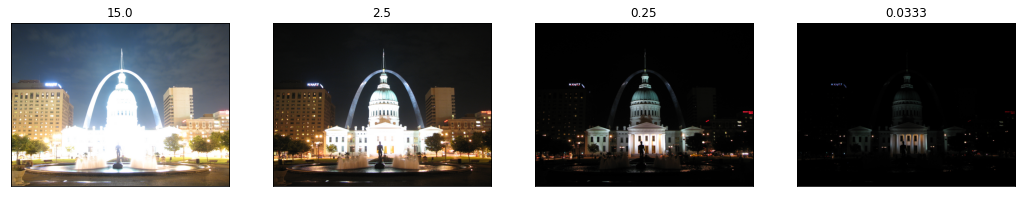

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading exposure images into a list
img_fn = ["images/img_15.jpg", "images/img_2.5.jpg", "images/img_0.25.jpg", "images/img_0.033.jpg"]
img_list = [cv2.imread(fn) for fn in img_fn]
exposure_times = np.array([15.0, 2.5, 0.25, 0.0333], dtype=np.float32)

# Show images
plt.figure(figsize=[18,4])
for i, (image, exposure) in enumerate(zip(img_list, exposure_times)):
    plt.subplot(1,4,i+1);plt.imshow(image[...,::-1]);plt.title(exposure);plt.xticks([]);plt.yticks([]);

### 2. Merge exposures into HDR image

In [2]:
# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

### 3. Convert to 8-bit and save

In [3]:
# Convert datatype to 8-bit and save
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')

### Results

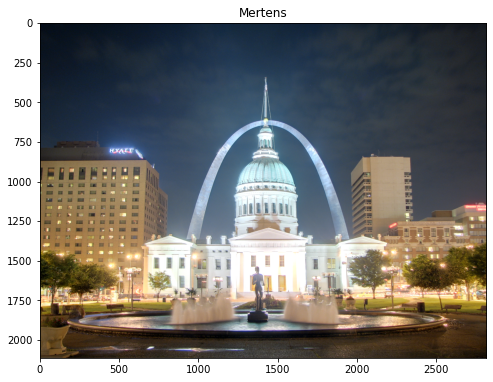

In [4]:
# Show images
plt.figure(figsize=[8,8])
plt.imshow(res_mertens_8bit[...,::-1]);plt.title("Mertens");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی روی تصاویر دیگر</div>

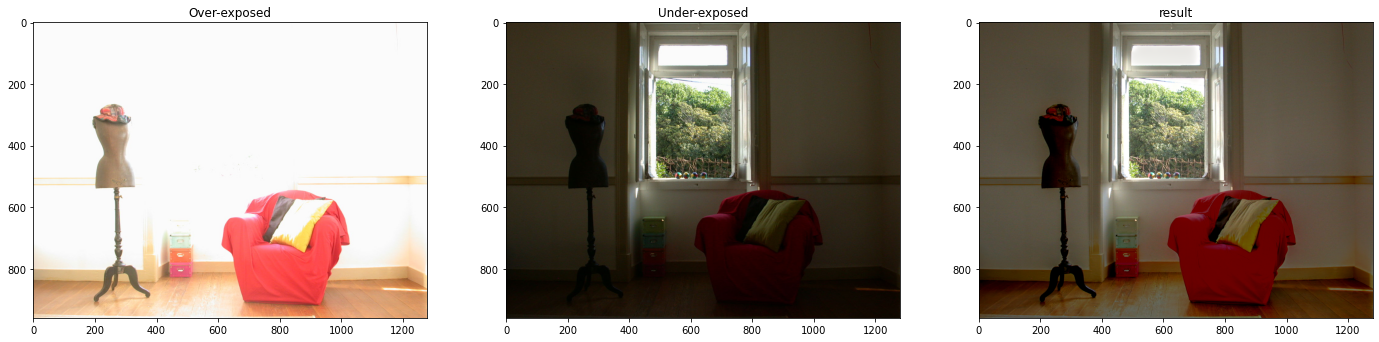

In [5]:
images = ['images/1280px-HDRI_Sample_Scene_Window_-_10.jpg','images/1280px-HDRI_Sample_Scene_Window_-_05.jpg']
img_list = [cv2.imread(fn) for fn in images]
# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
# Convert datatype to 8-bit and save
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
# Show images
plt.figure(figsize=[24,8])
plt.subplot(1,3,1);plt.imshow(img_list[0][...,::-1]);plt.title("Over-exposed");
plt.subplot(1,3,2);plt.imshow(img_list[1][...,::-1]);plt.title("Under-exposed");
plt.subplot(1,3,3);plt.imshow(res_mertens_8bit[...,::-1]);plt.title("result");

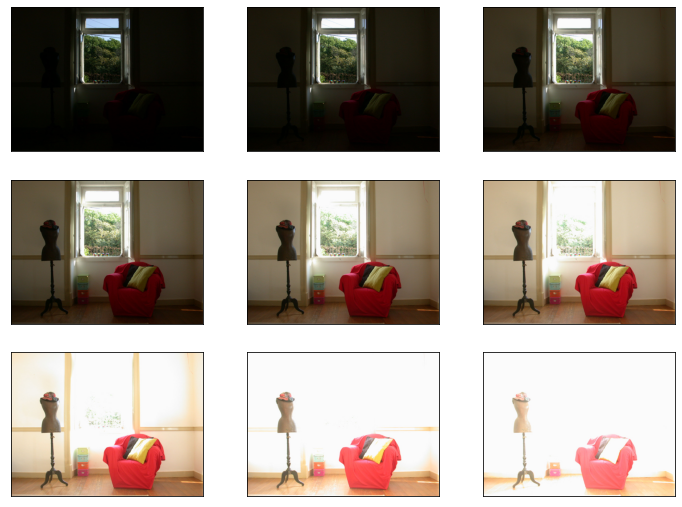

In [6]:
import glob
images = glob.glob('images/1280px-HDRI_Sample_Scene_Window_-*.jpg')
img_list = [cv2.imread(fn) for fn in images]
# Show images
plt.figure(figsize=[12,9])
for i, image in enumerate(img_list):
    plt.subplot(3,3,i+1);plt.imshow(image[...,::-1]);plt.xticks([]);plt.yticks([]);

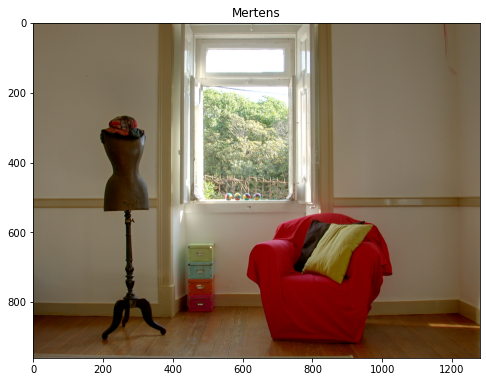

In [7]:
# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
# Convert datatype to 8-bit and save
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
# Show images
plt.figure(figsize=[8,8])
plt.imshow(res_mertens_8bit[...,::-1]);plt.title("Mertens");

**More information:**

https://www.youtube.com/watch?v=95DNdbxaIXE

https://docs.opencv.org/3.4/d2/df0/tutorial_py_hdr.html

https://learnopencv.com/high-dynamic-range-hdr-imaging-using-opencv-cpp-python/